In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
df = pd.read_csv('/home/palnika-chavan/Downloads/Dataset/height_weight_dataset.csv')
df.head()

,Weight (kg),Height (cm)
0,68.727006,166.164740
1,97.535715,197.899700
2,86.599697,183.341395
3,79.932924,174.413991
4,57.800932,141.968508


Text(0, 0.5, 'Height')

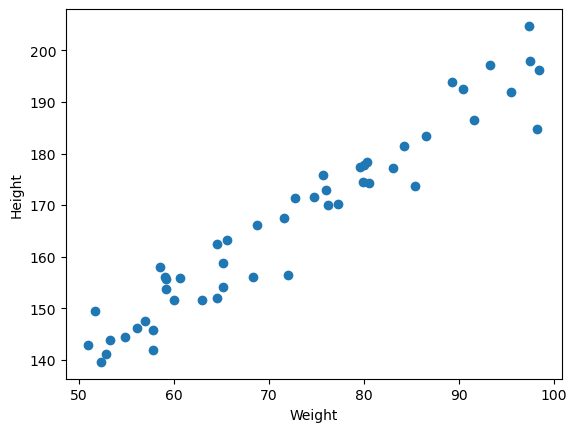

In [71]:
plt.scatter(df['Weight (kg)'], df['Height (cm)'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [72]:
df.corr()

,Weight (kg),Height (cm)
Weight (kg),1.00000,0.96558
Height (cm),0.96558,1.00000


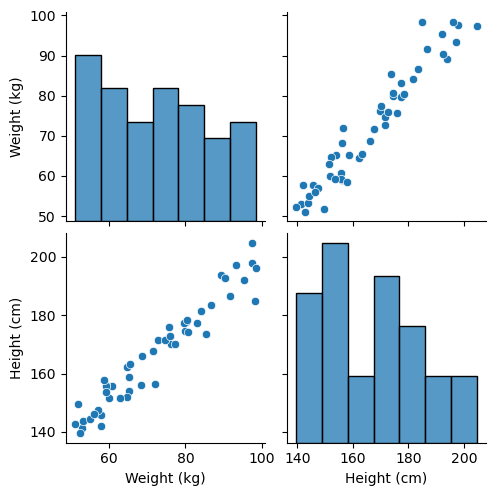

In [73]:
import seaborn as sns
sns.pairplot(df)

In [74]:
# create independant dependant features
X = df[['Weight (kg)']]  # should be a dataframe or a 2D array not a series
y = df['Height (cm)']  # can be a series as only 1 value will be there

In [75]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
# Standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [77]:
# simple linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [78]:
reg.coef_  # one slope cause only 1 feature is present 

array([17.17122175])

In [79]:
reg.intercept_  # single line ka ek intercept

167.69423452270394

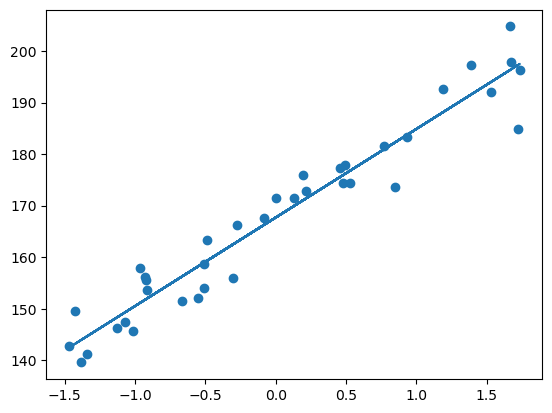

In [80]:
# plot best fit line wrt training data 
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train))

# PREDICTION OF TEST DATA
predicted height op = intercept + coeff(x_test)


In [81]:
y_pred = reg.predict(x_test)

In [84]:
# Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [85]:
print("MSE :", mse)
print("MAE :", mae)
print("RMSE :", rmse)
print("Score :", score)
print("Adjusted r2 Score :", adj_r2)

MSE : 22.066952888484085
MAE : 3.763234917356149
RMSE : 4.697547539779038
Score : 0.9160298718878047
Adjusted r2 Score : 0.9083962238776051


In [88]:
# OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train, x_train).fit()
prediction = model.predict(x_test)
prediction


array([-14.13918166,  -0.9238605 ,   8.78647233,  11.97568104,
         3.98396447,   5.25749434, -14.87388996,  19.09074914,
       -22.68324445,  -9.56281717,  21.83266157, -17.40629921,
       -20.7909471 ])

In [89]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Height (cm)   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):             -0.017
Method:                 Least Squares   F-statistic:                             0.3772
Date:                Tue, 11 Feb 2025   Prob (F-statistic):                       0.543
Time:                        17:17:10   Log-Likelihood:                         -242.03
No. Observations:                  37   AIC:                                      486.1
Df Residuals:                      36   BIC:                                      487.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [91]:
# prediction for new data

reg.predict(scaler.transform([[72]]))

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([166.76152795])